# Notable Observations: What makes them notable?

 According to the eBird API documentation, notable observations can be for locally or nationally rare species or are otherwise unusual, e.g. over-wintering birds in a species which is normally only a summer visitor.

# Issues to work:

1. DAVID - Notable birds in region - try Texas or Austin (Houston!!) -- pick a few wildlife refuges / on the coast / national seashore / etc

#### Citation: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

In [2]:
# import dependencies
import os, csv, requests, json, datetime  # might not need os
import pandas as pd
import plotly.express as px
from config import api_key, mapbox_token, g_key
from datetime import date

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

today = date.today()
back_short = 4
back_long = 30

In [3]:
# Obtain list of Texas cities and codes

regionType = "subnational2"
parentRegionCode = "US-TX"
state = "Texas"

url = (
    "https://api.ebird.org/v2/ref/region/list/"
    + regionType
    + "/"
    + parentRegionCode
    + ".json"
)

r = requests.get(url, params={"key": api_key})

In [4]:
r.url

'https://api.ebird.org/v2/ref/region/list/subnational2/US-TX.json?key=d56mdhi9b35r'

In [5]:
df_city_codes = pd.DataFrame(r.json())
df_city_codes.loc[df_city_codes["name"] == "Austin"]

code    name
7  US-TX-015  Austin

In [6]:
cities = df_city_codes[
    "code"
].to_list()  # save cities to a list to be able to iterate over later

In [7]:
# Observations in Texas

regionCode = "US-TX"

url_notables = (
    "https://api.ebird.org/v2/data/obs/"
    + regionCode
    + "/recent/notable?back=30"  # max number of days back for observations = 30
)

r_notables = requests.get(
    url_notables, params={"key": api_key, "back": back_long, "detail": "full"}
)

In [8]:
r_notables.status_code

200

In [9]:
r_notables.url

'https://api.ebird.org/v2/data/obs/US-TX/recent/notable?back=30&key=d56mdhi9b35r&back=30&detail=full'

## Notable Observations Dataframe

In [10]:
df_notables = pd.DataFrame(r_notables.json())

In [11]:
pd.to_datetime(df_notables["obsDt"])
df_notables["Year"] = pd.DatetimeIndex(df_notables["obsDt"]).year
df_notables["Month"] = pd.DatetimeIndex(df_notables["obsDt"]).month
df_notables["Day"] = pd.DatetimeIndex(df_notables["obsDt"]).day

In [12]:
df_notables.columns  # Pulled in the detailed dataset to pick which columns I wanted to keep and rename.

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'evidence',
       'firstName', 'lastName', 'hasRichMedia', 'Year', 'Month', 'Day'],
      dtype='object')

In [45]:
df_notables.drop(
    columns=[
        "locId",
        "locName",
        "obsValid",
        "obsReviewed",
        "locationPrivate",
        "subId",
        "userDisplayName",
        "obsId",
        "presenceNoted",
        "hasComments",
        "evidence",
        "firstName",
        "lastName",
        "hasRichMedia",
    ]
)

Species_Code                  Common_Name        Scientific_Name  \
0          spotow               Spotted Towhee       Pipilo maculatus   
1          spotow               Spotted Towhee       Pipilo maculatus   
2          sancra               Sandhill Crane    Antigone canadensis   
3          gowwar        Golden-winged Warbler  Vermivora chrysoptera   
4          gowwar        Golden-winged Warbler  Vermivora chrysoptera   
...           ...                          ...                    ...   
3822       btywar  Black-throated Gray Warbler   Setophaga nigrescens   
3823       btywar  Black-throated Gray Warbler   Setophaga nigrescens   
3824       ycnher   Yellow-crowned Night-Heron    Nyctanassa violacea   
3825       lessca                 Lesser Scaup         Aythya affinis   
3826       lessca                 Lesser Scaup         Aythya affinis   

                 obsDt  Bird_Count        lat         lng subnational2Code  \
0     2020-09-30 12:59         1.0  35.141304 -101.946168        US-TX-381   
1     2020-09-30 12:59         1.0  35.141304 -101.946168        US-TX-381   
2     2020-09-30 11:57         1.0  28.471728  -98.339438        US-TX-311   
3     2020-09-30 11:38         1.0  28.933623  -95.308725        US-TX-039   
4     2020-09-30 11:20         1.0  28.933623  -95.308725        US-TX-039   
...                ...         ...        ...         ...              ...   
3822  2020-08-31 16:30         1.0  30.300000  -97.894700        US-TX-453   
3823  2020-08-31 16:30         1.0  30.300000  -97.894700        US-TX-453   
3824  2020-08-31 16:00         1.0  35.238251 -101.833048        US-TX-375   
3825  2020-08-31 15:39         2.0  27.708527  -97.337972        US-TX-355   
3826  2020-08-31 15:39         2.0  27.708527  -97.337972        US-TX-355   

     City_Name State_Code State_Name Country_Code   Country_Name checklistId  \
0      Randall      US-TX      Texas           US  United States     CL23459   
1      Randall      US-TX      Texas           US  United States     CL23459   
2     McMullen      US-TX      Texas           US  United States     CL23600   
3     Brazoria      US-TX      Texas           US  United States     CL22320   
4     Brazoria      US-TX      Texas           US  United States     CL22320   
...        ...        ...        ...          ...            ...         ...   
3822    Travis      US-TX      Texas           US  United States     CL23311   
3823    Travis      US-TX      Texas           US  United States     CL23311   
3824    Potter      US-TX      Texas           US  United States     CL23458   
3825    Nueces      US-TX      Texas           US  United States     CL23511   
3826    Nueces      US-TX      Texas           US  United States     CL23511   

      Year  Month  Day  
0     2020      9   30  
1     2020      9   30  
2     2020      9   30  
3     2020      9   30  
4     2020      9   30  
...    ...    ...  ...  
3822  2020      8   31  
3823  2020      8   31  
3824  2020      8   31  
3825  2020      8   31  
3826  2020      8   31  

[3827 rows x 17 columns]

In [47]:
columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
    "subnational2Name": "City_Name",
    "subnational1Code": "State_Code",
    "subnational1Name": "State_Name",
    "countryCode": "Country_Code",
    "countryName": "Country_Name",
}

df_notables = df_notables.rename(columns=columns_dict)

In [48]:
df_notables["Bird_Count"].fillna(value=1, inplace=True)

df_notables.to_csv("NotableObs_eBird.csv", index=False)

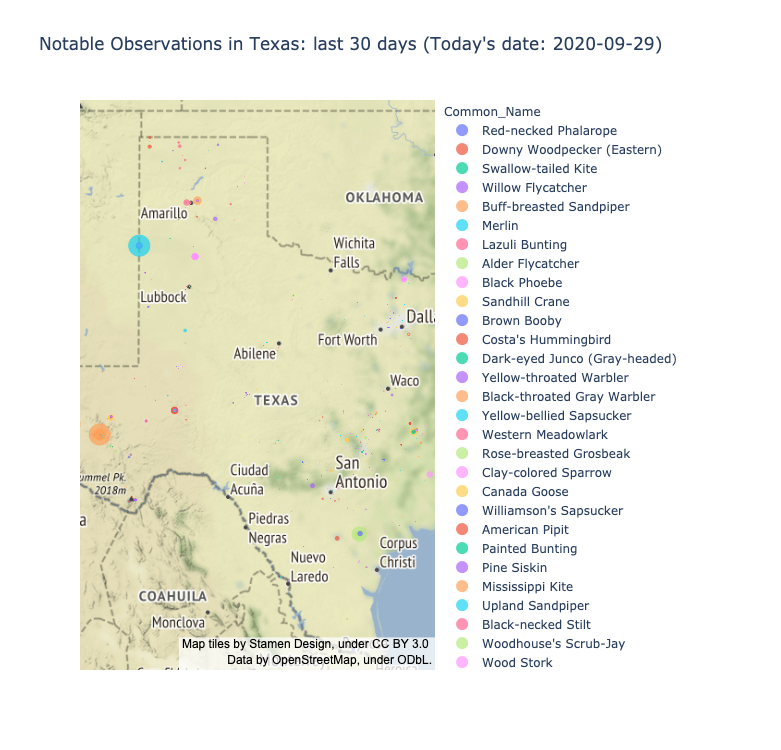

In [189]:
# mapbox_style options:
#     'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
#     which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`

fig_df_notables = px.scatter_mapbox(
    df_notables,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "obsDt"],
    title=f"Notable Observations in {state}: last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    height=750,
)
fig_df_notables.show()

In [15]:
df_notables.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'obsDt', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'subnational2Code', 'City_Name',
       'State_Code', 'State_Name', 'Country_Code', 'Country_Name',
       'userDisplayName', 'obsId', 'checklistId', 'presenceNoted',
       'hasComments', 'evidence', 'firstName', 'lastName', 'hasRichMedia',
       'Year', 'Month', 'Day'],
      dtype='object')

In [16]:
name_count = df_notables["Common_Name"].value_counts()
name_count.to_frame()

Common_Name
Calliope Hummingbird                      154
Red-necked Phalarope                      108
Sabine's Gull                             107
Rufous Hummingbird                         92
Anna's Hummingbird                         81
...                                       ...
Eastern Wood-Pewee                          1
Fox Sparrow                                 1
Downy Woodpecker (Eastern)                  1
White-crowned Sparrow (oriantha)            1
Ferruginous Duck                            1

[322 rows x 1 columns]

In [31]:
calliope_df = df_notables.loc[df_notables["Common_Name"] == "Calliope Hummingbird"]
calliope_df.head(1)

Species_Code           Common_Name       Scientific_Name    locId  \
497       calhum  Calliope Hummingbird  Selasphorus calliope  L839995   

                                  locName             obsDt  Bird_Count  \
497  Riverpark Nature Trails (Sugar Land)  2020-09-26 16:15         1.0   

          lat        lng  obsValid  ...  checklistId  presenceNoted  \
497  29.57722 -95.677732      True  ...      CL22324          False   

    hasComments evidence firstName    lastName hasRichMedia  Year Month Day  
497       False      NaN      Jean  Greenhalgh        False  2020     9  26  

[1 rows x 31 columns]

In [18]:
species = "Calliope Hummingbird"

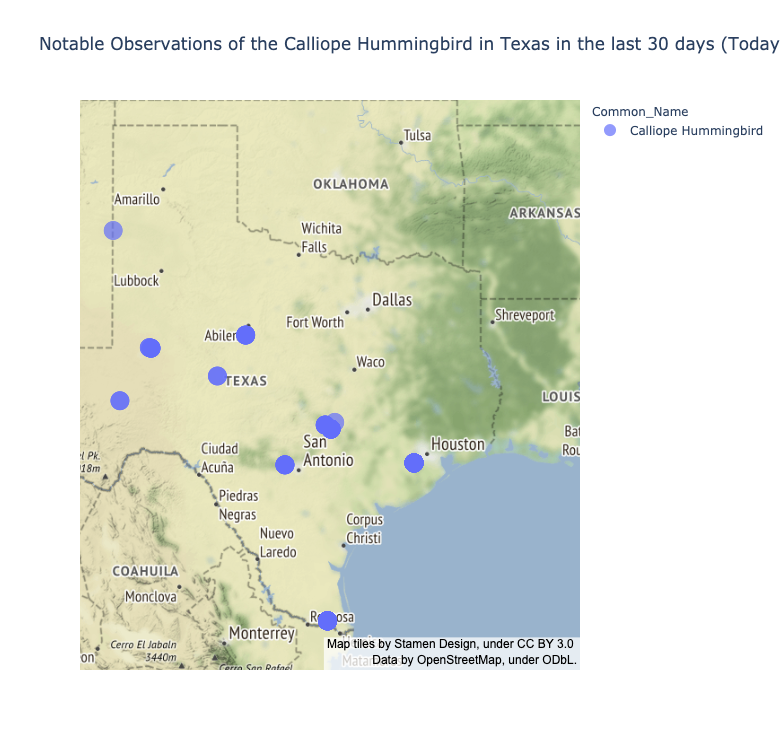

In [168]:
# Maps with plotly


species_plot = df_notables.loc[df_notables["Common_Name"] == f"{species}"]

fig_species_plot = px.scatter_mapbox(
    species_plot,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "obsDt"],
    title=f"Notable Observations of the {species} in {state} in the last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    height=750,
)
fig_species_plot.show()

In [32]:
# Get the taxonomy for the most common observed species
species_code = "calhum"
url_species_taxonomy = "https://api.ebird.org/v2/ref/taxonomy/ebird"

r_species_taxonomy = requests.get(
    url_species_taxonomy,
    params={"key": api_key, "fmt": "json", "species": species_code},
)

In [33]:
r_species_taxonomy.json()

[{'sciName': 'Selasphorus calliope',
  'comName': 'Calliope Hummingbird',
  'speciesCode': 'calhum',
  'category': 'species',
  'taxonOrder': 4691.0,
  'bandingCodes': ['CAHU'],
  'comNameCodes': [],
  'sciNameCodes': ['SECA'],
  'order': 'Caprimulgiformes',
  'familyComName': 'Hummingbirds',
  'familySciName': 'Trochilidae'}]

In [36]:
df_species_taxonomy = pd.DataFrame(r_species_taxonomy.json())
df_species_taxonomy

sciName               comName speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName familySciName  
0  Hummingbirds   Trochilidae

In [41]:
df_species_taxonomy = df_species_taxonomy.rename(
    columns={
        "order": "Order",
        "familySciName": "Family_Name",
        "comName": "Common_Name",
        "sciName": "Scientific_Name",
    }
)

In [42]:
df_species_taxonomy

Scientific_Name           Common_Name speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             Order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName  Family_Name  
0  Hummingbirds  Trochilidae

In [38]:
calliope_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'obsDt', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'subnational2Code', 'City_Name',
       'State_Code', 'State_Name', 'Country_Code', 'Country_Name',
       'userDisplayName', 'obsId', 'checklistId', 'presenceNoted',
       'hasComments', 'evidence', 'firstName', 'lastName', 'hasRichMedia',
       'Year', 'Month', 'Day'],
      dtype='object')

In [185]:
# Get data for all notable observations across the US

regionCodeUS = "US"

url_notables_US = (
    f"https://api.ebird.org/v2/data/obs/" + regionCodeUS + "/recent/notable?"
)

r_notables_US = requests.get(
    url_notables_US, params={"key": api_key, "back": back_long, "detail": "full"}
)

In [186]:
r_notables_US.status_code

200

In [176]:
df_notables_US = pd.DataFrame(r_notables_US.json())
df_notables_US.columns

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence'],
      dtype='object')

In [187]:
df_notables_US["howMany"].fillna(value=1, inplace=True)

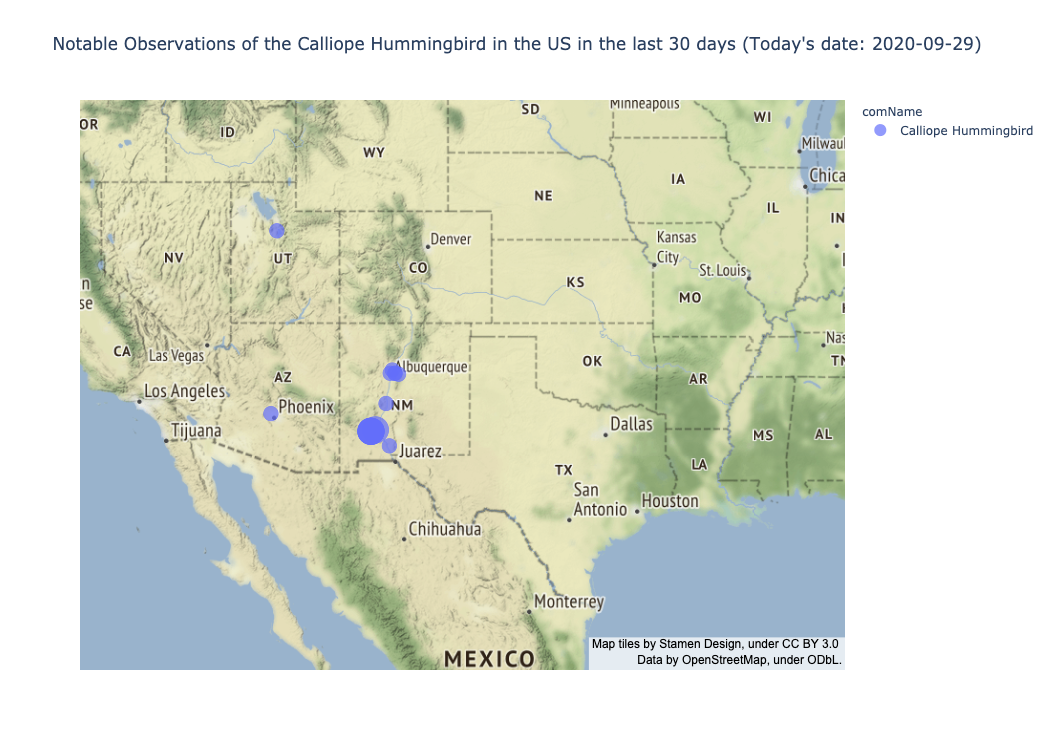

In [188]:
# fig_US = px.scatter_mapbox(
#     df_notables_US,
#     lat="lat",
#     lon="lng",
#     color="comName",
#     hover_data=["howMany", "obsDt", "subId"],
#     title=f"Notable Observations in the US - past {back} days (Today's date: {today})",
# )
# fig_US.show()

species = "Calliope Hummingbird"

species_plot = df_notables_US.loc[df_notables_US["comName"] == f"{species}"]

# Covering US for full 30 days and especially for a single species won't work because you're limited to 10k records. Could be missing a large portion of data.

fig_df_notables_US = px.scatter_mapbox(
    species_plot,
    lat="lat",
    lon="lng",
    color="comName",
    size="howMany",
    hover_name="comName",
    hover_data=["howMany", "obsDt"],
    title=f"Notable Observations of the {species} in the US in the last {back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    height=750,
)
fig_df_notables_US.show()

## Histogram of observations count by US State

In [178]:
state_code = df_notables_US["subnational1Code"]

state_codes = pd.DataFrame({"State_Code": state_code})
state_codes

State_Code
0         US-NJ
1         US-MI
2         US-MI
3         US-RI
4         US-RI
...         ...
9995      US-NM
9996      US-NM
9997      US-NM
9998      US-FL
9999      US-DC

[10000 rows x 1 columns]

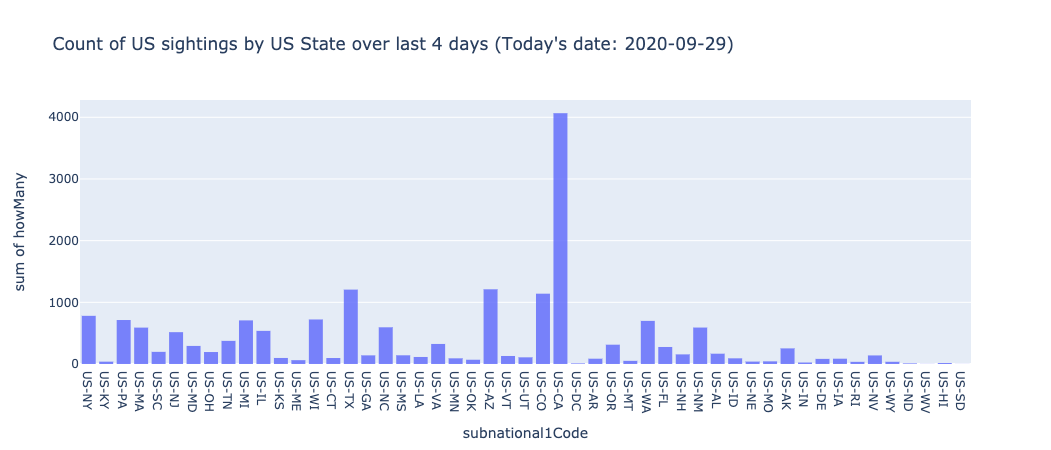

In [80]:
# loc_state = df_notables_US["subnational1Code"].unique()
# obs_count = df_notables_US["subnational1Code"].value_counts()

px.histogram(
    df_notables_US,
    x="subnational1Code",
    y="howMany",
    title=f"Count of US sightings by US State over last {back} days (Today's date: {today})",
    labels={"y": "Obs Count"},
    opacity=0.85,
    hover_name="subnational1Code",
)

# Animated Map

In [81]:
df_notables_US = df_notables_US.dropna().reset_index(drop=True)

In [82]:
pd.to_datetime(df_notables_US["obsDt"])
df_notables_US["Year"] = pd.DatetimeIndex(df_notables_US["obsDt"]).year
df_notables_US["Month"] = pd.DatetimeIndex(df_notables_US["obsDt"]).month
df_notables_US["Day"] = pd.DatetimeIndex(df_notables_US["obsDt"]).day

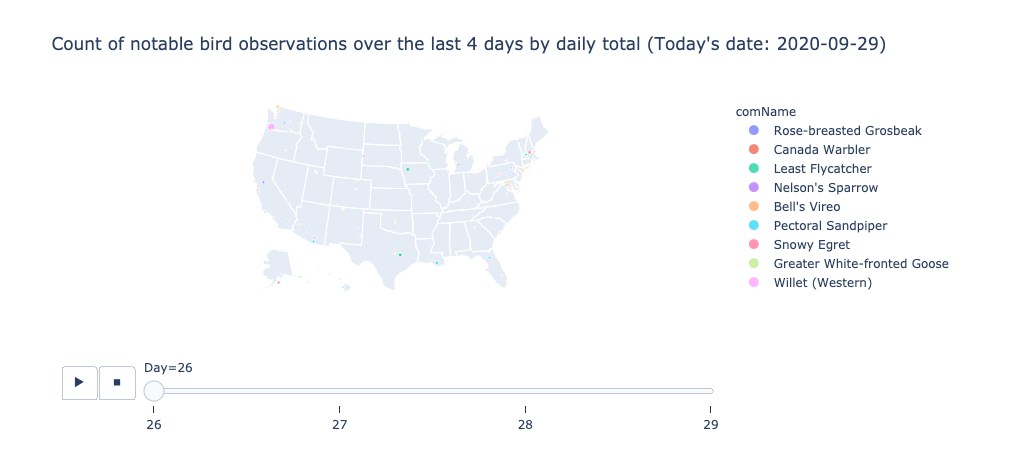

In [83]:
# Animate observations over time (4 days. Going back more than 4 days exceeds the allowable limit on number of records to request at a time for the API).
# Was going to iteratively add counts by days but maybe don't want to show the accumulation? May just want to show the total by day?
# Have two maps: one with accumulated observations over the 4 days, one with counts per day.
# With this map, you can identify an observation of interest, then research the bird type to find out why the observation is "notable".

animate_plot_df = df_notables_US.sort_values(by=["Day"], ignore_index=True)

fig_animate = px.scatter_geo(
    animate_plot_df,
    color="comName",
    lat="lat",
    lon="lng",
    hover_name="sciName",
    size="howMany",
    animation_frame="Day",
    projection="albers usa",
    title=f"Count of notable bird observations over the last {back} days by daily total (Today's date: {today})",
)

fig_animate.show()

# lat="lat", lon="lng",
# locations="US_State",
# locationmode="USA-states",

In [187]:
animate_plot_df.head(1)

speciesCode                   comName       sciName    locId        locName  \
0      lbbgul  Lesser Black-backed Gull  Larus fuscus  L142267  Heron Lake SP   

              obsDt  howMany        lat         lng  obsValid  ...  \
0  2020-09-26 10:02      2.0  36.679584 -106.686699      True  ...   

   checklistId  presenceNoted hasComments firstName  lastName hasRichMedia  \
0      CL23230          False       False     Wyatt  Egelhoff         True   

  evidence  Year Month Day  
0        P  2020     9  26  

[1 rows x 31 columns]

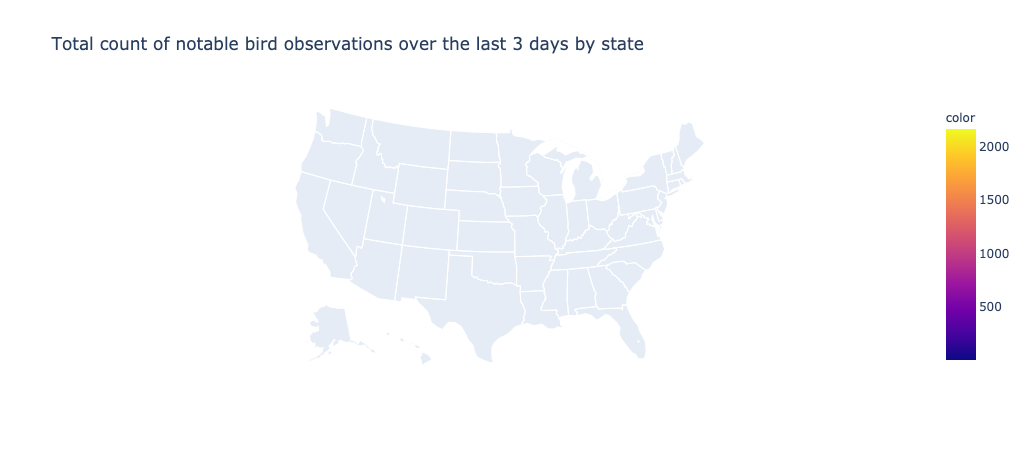

In [127]:
fig_bubble = px.scatter_geo(
    df_notables_US,
    color=obs_count,
    locations=loc_state,
    hover_name=obs_count,
    size=obs_count,
    projection="albers usa",
    title=f"Total count of notable bird observations over the last {back} days by state (Today's date: {today})",
)
fig_bubble.show()

## Notes:
### Data cleaning: 
#### * Renamed columns --Drop some unneeded columns?
#### * From obsDt column, created new columns Year, Month, Day, and US_State.
#### * Filtered out rows with NA data. Was it only one row with NA for "howMany"? If so, maybe do .fillna() with a value of "1" since the observation wouldn't have been recorded if there were 0 birds. Also, most observations are of 1 bird, right?

### Multiple Data Sources:
#### * eBird
#### * Google API - used reverse geocoding to get state from lat/long. --still working on this (9/28/20)--

# TEST AREA

In [36]:
# latlong = "40.714224,-73.961452"
# url_googleapi = (
#     f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}"
# )

# r_states = requests.get(url_googleapi)

# states = r_states.json()
# states["results"][0]["address_components"][5]["short_name"]

# state = states["results"][0]["address_components"][5]["short_name"]
# state

In [25]:
# url_googleapi = (f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}")

state_abbr = [
    "AL",
    "AK",
    "AZ",
    "AR",
    "CA",
    "CO",
    "CT",
    "DC",
    "DE",
    "FL",
    "GA",
    "HI",
    "ID",
    "IL",
    "IN",
    "IA",
    "KS",
    "KY",
    "LA",
    "ME",
    "MD",
    "MA",
    "MI",
    "MN",
    "MS",
    "MO",
    "MT",
    "NE",
    "NV",
    "NH",
    "NJ",
    "NM",
    "NY",
    "NC",
    "ND",
    "OH",
    "OK",
    "OR",
    "PA",
    "RI",
    "SC",
    "SD",
    "TN",
    "TX",
    "UT",
    "VT",
    "VA",
    "WA",
    "WV",
    "WI",
    "WY",
]

for i in df_notables.index:

    lat = df_notables.loc[i, "lat"]
    lng = df_notables.loc[i, "lng"]

    lat_lng_str = str(lat) + "," + str(lng)

    try:
        r_states = requests.get(
            f"https://maps.googleapis.com/maps/api/geocode/json?latlng={lat_lng_str}&key={g_key}"
        )

        states = r_states.json()
        state = states["results"][0]["address_components"][4]["short_name"]

        df_notables.loc[i, "US_State"] = state
    except:
        pass

In [135]:
states["results"][0]["address_components"][4]["short_name"]

'TX'

In [136]:
states["results"][0]["address_components"]

[{'long_name': '1104', 'short_name': '1104', 'types': ['street_number']},
 {'long_name': 'Scarlet Court',
  'short_name': 'Scarlet Ct',
  'types': ['route']},
 {'long_name': 'Colleyville',
  'short_name': 'Colleyville',
  'types': ['locality', 'political']},
 {'long_name': 'Tarrant County',
  'short_name': 'Tarrant County',
  'types': ['administrative_area_level_2', 'political']},
 {'long_name': 'Texas',
  'short_name': 'TX',
  'types': ['administrative_area_level_1', 'political']},
 {'long_name': 'United States',
  'short_name': 'US',
  'types': ['country', 'political']},
 {'long_name': '76034', 'short_name': '76034', 'types': ['postal_code']},
 {'long_name': '4107', 'short_name': '4107', 'types': ['postal_code_suffix']}]

In [137]:
df_notables.loc[df_notables["US_State"] == "Bell County"]

speciesCode           comName           sciName     locId  \
96      coukin  Couch's Kingbird  Tyrannus couchii  L4904145   

                          locName             obsDt  howMany        lat  \
96  Belton--Harris Community Park  2020-09-26 15:55      1.0  31.060991   

          lng  obsValid  obsReviewed  locationPrivate      subId     US_State  
96 -97.465424      True         True            False  S74098380  Bell County

In [138]:
r_check = requests.get(
    f"https://maps.googleapis.com/maps/api/geocode/json?latlng=31.060991,-97.465424&key={g_key}"
)
check = r_check.json()

In [139]:
check["results"][0]["address_components"][4]

{'long_name': 'Bell County',
 'short_name': 'Bell County',
 'types': ['administrative_area_level_2', 'political']}

In [142]:
# getting a list of sub-region codes (subnational1 for US is a list of states, subnational2 for US-TX is a list of cities)
regionType = "subnational1"
parentRegionCode = "US-TX"

url_state_codes = (
    "https://api.ebird.org/v2/ref/region/list/"
    + regionType
    + "/"
    + parentRegionCode
    + ".json"
)

r_state_codes = requests.get(url_state_codes, params={"key": api_key})

df_state_codes = pd.DataFrame(r.json())
df_state_codes

code      name
0    US-TX-001  Anderson
1    US-TX-003   Andrews
2    US-TX-005  Angelina
3    US-TX-007   Aransas
4    US-TX-009    Archer
..         ...       ...
249  US-TX-499      Wood
250  US-TX-501    Yoakum
251  US-TX-503     Young
252  US-TX-505    Zapata
253  US-TX-507    Zavala

[254 rows x 2 columns]

In [43]:
# for i in df_notables_US.index:

#     lat = df_notables_US.loc[i, "lat"]
#     lng = df_notables_US.loc[i, "lng"]

#     lat_lng_str = str(lat) + "," + str(lng)

#     try:
#         r = requests.get(
#             "https://maps.googleapis.com/maps/api/place/nearbysearch/json",
#             params={
#                 "location": lat_lng_str,
#                 "radius": 5000,
#                 "type": "lodging",
#                 "key": g_key,
#             },
#         )
#         hotel_df.loc[i, "Hotel_Name"] = r.json()["results"][0]["name"]
#     except:
#         pass

In [ ]:
student_df = pd.read_csv(students_csv)

city_table = pd.DataFrame(city_data)
city_table.to_csv("data/city_weather_data.csv", index=False)

In [ ]:
# ## Import up sound alert dependencies
# from IPython.display import Audio, display

# def allDone():
#   display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
# ## Insert whatever audio file you want above
# allDone()